# Assignment Objective
Build a model to predict the house prices

# Import Libraries

In [1]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Import the dataset

In [2]:
# Import dataset as a pandas DataFrame
df = pd.read_excel('./dataset1.xlsx')

# Exploratory Data Analysis

## View 5 random samples

In [3]:
df.sample(5)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
16086,-121.99,37.37,27,1797,538.0,1610,531,4.2422,237500,<1H OCEAN
2762,-119.14,35.76,30,735,137.0,421,113,2.5625,156300,INLAND
13079,-117.25,32.96,18,4773,743.0,1970,716,6.6199,406200,NEAR OCEAN
16377,-122.09,37.41,8,1480,414.0,856,445,2.8203,284100,NEAR BAY
6274,-118.01,33.97,36,1451,224.0,608,246,6.0648,290800,<1H OCEAN


## View the number of rows and columns in the dataset

In [4]:
df.shape

(18565, 10)

## View number of missing values in each column

In [5]:
df.isnull().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        189
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

## Drop rows that have missing values for total_bedrooms

In [6]:
# total_bedrooms has 189 missing values
# remove null values, as they are ,1% of datapoints
df = df.dropna()

In [7]:
df.isnull().sum()

longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
median_house_value    0
ocean_proximity       0
dtype: int64

## View the distribution of features and target variable

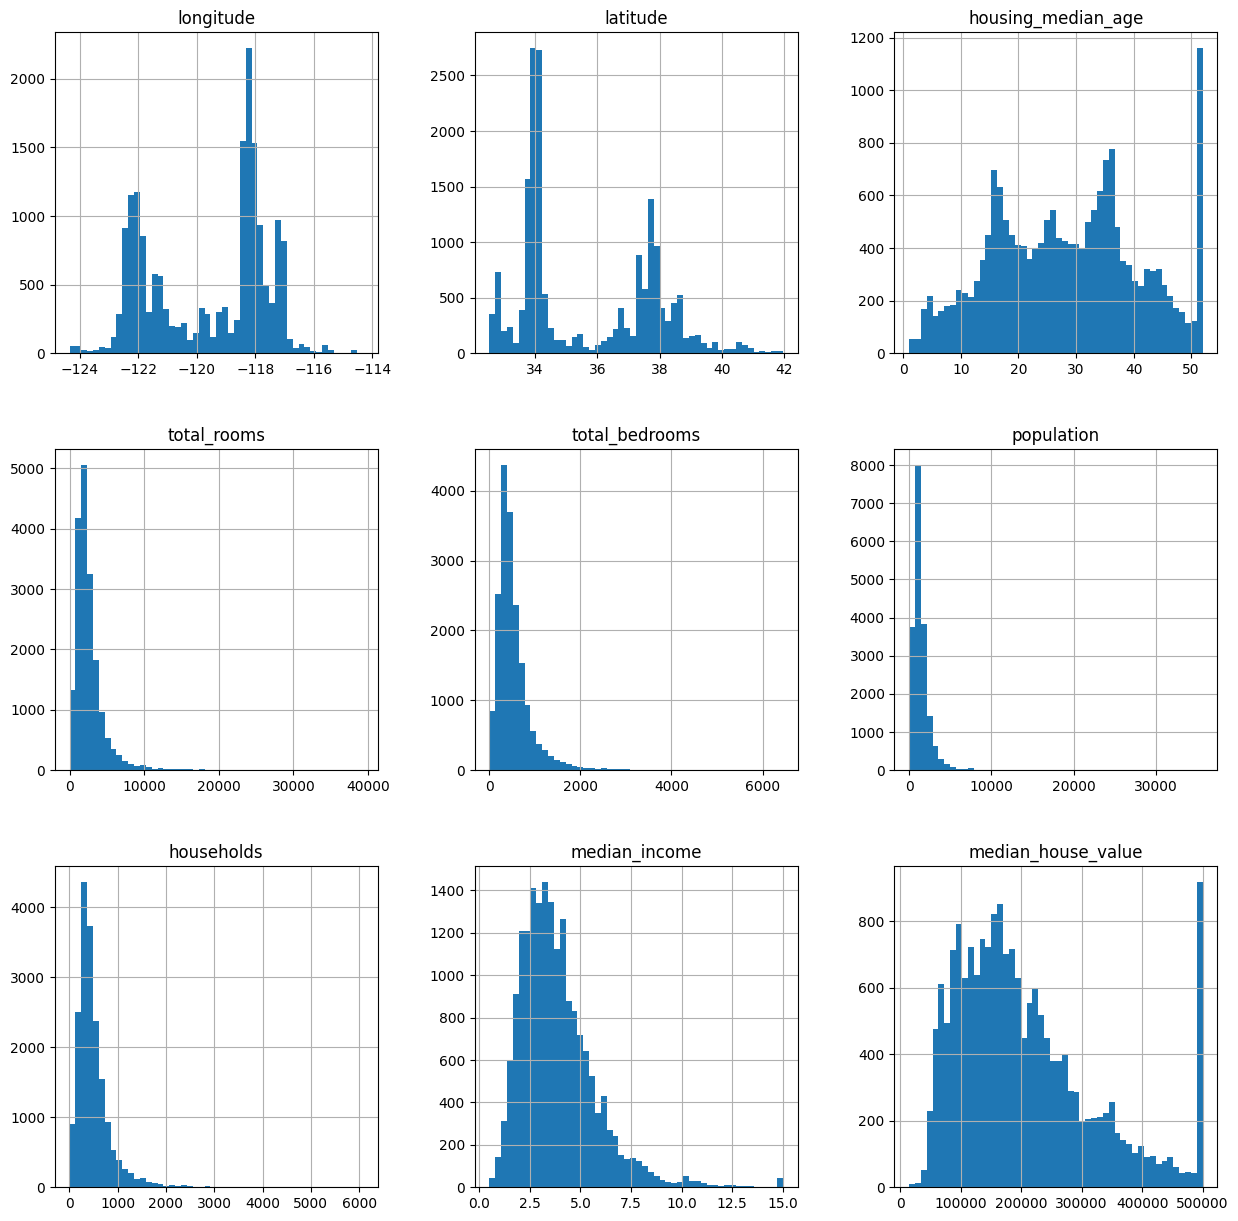

In [8]:
# View distribution of  variables
df.hist(bins=50, figsize=(15, 15))
plt.show()

## Target variable has outliers

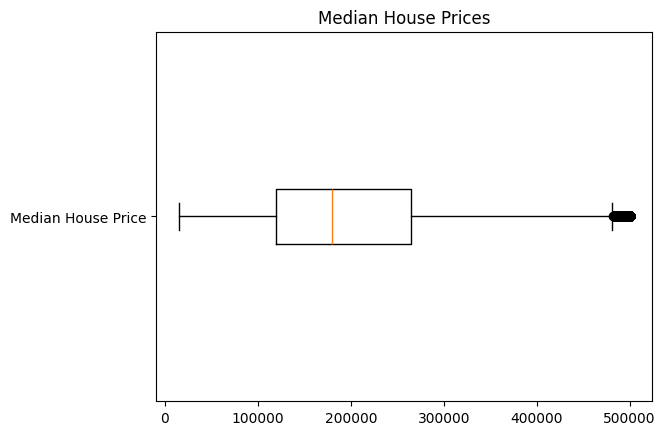

In [9]:
plt.boxplot(df['median_house_value'], tick_labels=['Median House Price'],vert=False) 
plt.title('Median House Prices') 
plt.show()

## Remove outliers in target variable

In [10]:
# Remove outliers
min_value = df['median_house_value'].min()
q1,q3 = np.percentile(df['median_house_value'],[25,75])
median = df['median_house_value'].median()
max_value = df['median_house_value'].max()
min_value,q1,q3,median,max_value

(14999, 119200.0, 264325.0, 179400.0, 500001)

In [11]:
iqr = q3-q1
lower_boundary = q1 - 1.5*iqr
upper_boundary = q3 + 1.5*iqr
range = [lower_boundary,upper_boundary]
range

[-98487.5, 482012.5]

In [12]:
# outliers
outlier = df[(df['median_house_value'] < lower_boundary) | (df['median_house_value']> upper_boundary)]
outlier

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
82,-122.27,37.80,52,249,78.0,396,85,1.2434,500001,NEAR BAY
414,-122.25,37.87,52,609,236.0,1349,250,1.1696,500001,NEAR BAY
444,-122.25,37.86,48,2153,517.0,1656,459,3.0417,489600,NEAR BAY
448,-122.24,37.86,52,1668,225.0,517,214,7.8521,500001,NEAR BAY
449,-122.24,37.85,52,3726,474.0,1366,496,9.3959,500001,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
18366,-118.90,34.14,35,1503,263.0,576,216,5.1457,500001,<1H OCEAN
18370,-118.69,34.18,11,1177,138.0,415,119,10.0472,500001,<1H OCEAN
18371,-118.80,34.19,4,15572,2222.0,5495,2152,8.6499,500001,<1H OCEAN
18380,-118.69,34.21,10,3663,409.0,1179,371,12.5420,500001,<1H OCEAN


In [13]:
df = df[(df['median_house_value'] > lower_boundary) & (df['median_house_value'] < upper_boundary)]

In [14]:
df.shape

(17419, 10)

## View the datatype of each column

In [15]:
df.dtypes

longitude             float64
latitude              float64
housing_median_age      int64
total_rooms             int64
total_bedrooms        float64
population              int64
households              int64
median_income         float64
median_house_value      int64
ocean_proximity        object
dtype: object

## One-Hot Encoding for categorical variable

In [16]:
# One-Hot Encoding for ocean_proximity
df['ocean_proximity'].unique()

array(['NEAR BAY', '<1H OCEAN', 'INLAND', 'NEAR OCEAN', 'ISLAND'],
      dtype=object)

In [17]:
from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore').set_output(transform='pandas')
ohe_transform = encoder.fit_transform(df[['ocean_proximity']])
df = pd.concat([df,ohe_transform], axis=1).drop(columns=['ocean_proximity'])

In [18]:
df.sample()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity_<1H OCEAN,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN
14962,-120.65,35.27,27,2034,341.0,768,316,4.2411,258900,0.0,0.0,0.0,0.0,1.0


## Setup validation framework: Split data into training & test sets

In [19]:
# Split data into train, test, split
y = df['median_house_value']

In [20]:
X = df.drop('median_house_value',axis=1)

In [21]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=4)

In [22]:
X_train.shape

(13935, 13)

In [23]:
X_test.shape

(3484, 13)

In [24]:
y_train.shape

(13935,)

In [25]:
y_test.shape

(3484,)

# Fitting the Random Forest Model

In [26]:
# Modelling
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, ConfusionMatrixDisplay
from sklearn.model_selection import RandomizedSearchCV, train_test_split
from scipy.stats import randint

# Tree Visualisation
from sklearn.tree import export_graphviz
from IPython.display import Image
import graphviz

In [27]:
rf = RandomForestClassifier()
rf.fit(X_train, y_train)

,n_estimators,100
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [28]:
y_pred = rf.predict(X_test)

In [29]:
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.003444316877152698


/Users/shyamgupta/Documents/uohvenv/lib/python3.12/site-packages/sklearn/metrics/_classification.py:98: UserWarning: The number of unique classes is greater than 50% of the number of samples.
  type_true = type_of_target(y_true, input_name="y_true")
/Users/shyamgupta/Documents/uohvenv/lib/python3.12/site-packages/sklearn/metrics/_classification.py:99: UserWarning: The number of unique classes is greater than 50% of the number of samples.
  type_pred = type_of_target(y_pred, input_name="y_pred")


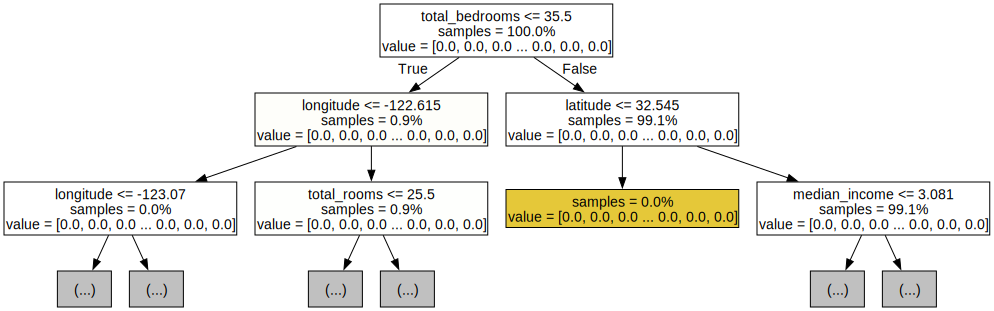

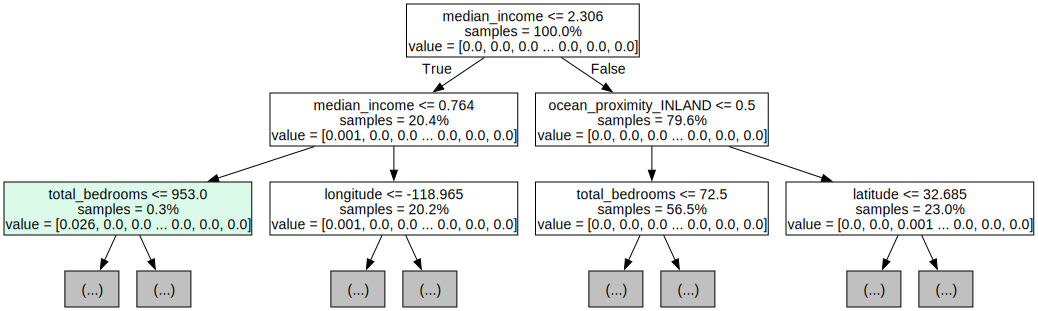

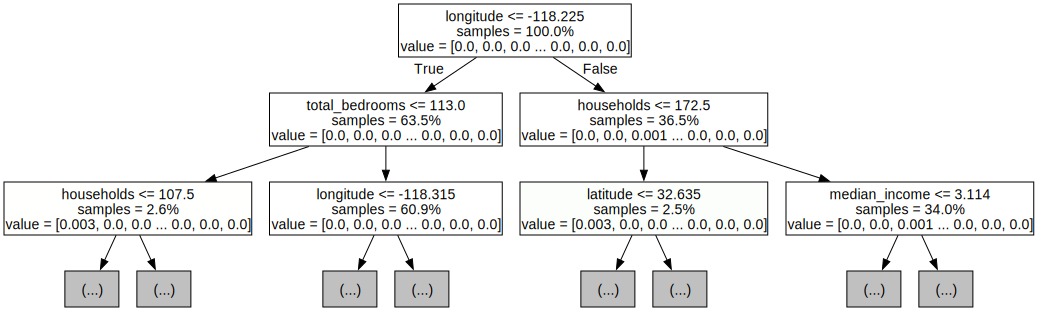

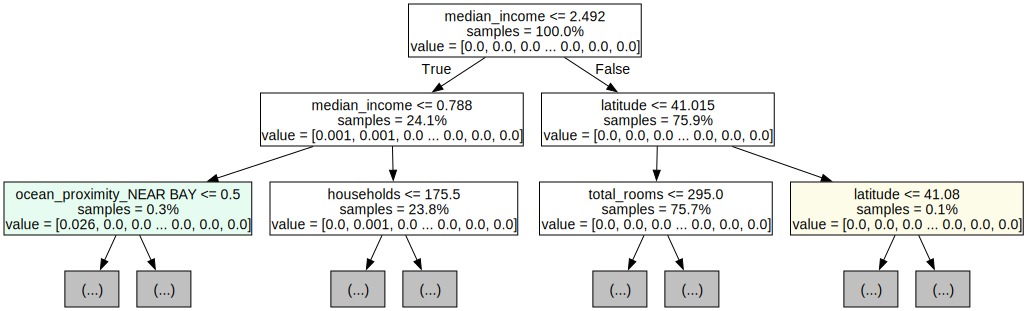

In [37]:
# Export the first three decision trees from the forest
i=0
while i <=3:
    tree = rf.estimators_[i]
    dot_data = export_graphviz(tree,
                               feature_names=X_train.columns,  
                               filled=True,  
                               max_depth=2, 
                               impurity=False, 
                               proportion=True)
    graph = graphviz.Source(dot_data)
    display(graph)
    i += 1